In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Note: Duc did this first part; necessary for me to play :)

In [2]:
train = pd.read_csv("covid2train.csv", index_col = 0)

In [3]:
def clean(train):
    features = ['age', 'sex', 'country', 'chronic_disease_binary', 'que_paso']
    xtrain = train[features]

# Dropping NA's from only 'sex' + 'country'    
    subset = xtrain.dropna(subset = ['age','sex','country'])
    countries = xtrain['country'].drop_duplicates().dropna()

# Replacing the age ranges with their means    
    mp = {'20-29': np.mean([20,29]), '40-49': np.mean([40,49]),'50-59': np.mean([50,59]),
          '60-69': np.mean([60,69]), '70-79': np.mean([70,79]),
          '80-89': np.mean([80,89]),'90-99': np.mean([90,99]), '80-': 80}
    
# Dictionary replacing countries with numerical values
    mp2 = {}
    key = np.arange(len(countries) + 1)
    for i,j in zip(countries,key):
        val = {i:j}
        mp2.update(val)
        
    mp3 = {'male': 0, 'female': 1}
        
# Updating the training data with new values
    subset = subset.replace(mp).replace(mp2).replace(mp3)
    subset['chronic_disease_binary'] = subset['chronic_disease_binary']*1
    subset['age'] = subset['age'].astype(float)
    
    xtrain = subset
    ytrain = subset['que_paso']
    return xtrain, ytrain, mp2

In [4]:
xtrain, ytrain, mp2 = clean(train)

#### Done by ya boi, Matt "the 'n' is silent" Nwerem, cheeeeeeeyuuuuh

In [5]:
xtrain.age.value_counts()

30.0    18
84.5    17
38.0    17
42.0    15
39.0    15
        ..
14.0     1
10.0     1
92.0     1
15.0     1
9.0      1
Name: age, Length: 96, dtype: int64

In [6]:
ytrain.value_counts()

1    455
0    218
Name: que_paso, dtype: int64

In [7]:
xtrain

,age,sex,country,chronic_disease_binary,que_paso
1,78.0,0,1,0,0
2,61.0,1,2,0,1
113,28.0,0,2,0,1
224,56.0,1,2,0,1
335,79.0,1,2,0,1
...,...,...,...,...,...
217292,84.5,1,15,0,0
217293,44.5,1,15,0,1
226430,80.0,1,15,0,0
228855,94.5,1,15,0,0


In [8]:
xtrain.sex.value_counts()

0    406
1    267
Name: sex, dtype: int64

In [9]:
ytrain     

1         0
2         1
113       1
224       1
335       1
         ..
217292    0
217293    1
226430    0
228855    0
229810    1
Name: que_paso, Length: 673, dtype: int64

### Linear Regression

##### Sex and Age explain the most amount of data

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [11]:
reg = sm.add_constant(xtrain['age'])
results = sm.OLS(ytrain, reg).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               que_paso   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     398.0
Date:                Mon, 11 May 2020   Prob (F-statistic):           6.99e-70
Time:                        18:24:18   Log-Likelihood:                -287.19
No. Observations:                 673   AIC:                             578.4
Df Residuals:                     671   BIC:                             587.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3441      0.036     36.911      0.000       1.273       1.416
age           -0.0134      0.001    -19.950      0.000      -0.015      -0.012
==============================================================================
Omnibus:                       23.503   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.450
Skew:                          -0.268   Prob(JB):                     0.000268
Kurtosis:                       2.452   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
reg = sm.add_constant(xtrain['chronic_disease_binary'])
results = sm.OLS(ytrain, reg).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               que_paso   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     226.6
Date:                Mon, 11 May 2020   Prob (F-statistic):           2.45e-44
Time:                        18:24:18   Log-Likelihood:                -345.99
No. Observations:                 673   AIC:                             696.0
Df Residuals:                     671   BIC:                             705.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.7873      0.017     45.564      0.000       0.753       0.821
chronic_disease_binary    -0.6084      0.040    -15.054      0.000      -0.688      -0.529
==============================================================================
Omnibus:                       73.440   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.653
Skew:                          -0.927   Prob(JB):                     1.03e-21
Kurtosis:                       3.101   Cond. No.                         2.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
reg = sm.add_constant(xtrain['sex'])
results = sm.OLS(ytrain, reg).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               que_paso   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.554
Date:                Mon, 11 May 2020   Prob (F-statistic):              0.110
Time:                        18:24:19   Log-Likelihood:                -442.63
No. Observations:                 673   AIC:                             889.3
Df Residuals:                     671   BIC:                             898.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6527      0.023     28.115      0.000       0.607       0.698
sex            0.0589      0.037      1.598      0.110      -0.013       0.131
==============================================================================
Omnibus:                     8861.567   Durbin-Watson:                   0.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.564
Skew:                          -0.748   Prob(JB):                     1.09e-26
Kurtosis:                       1.577   Cond. No.                         2.45
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
columns = xtrain[['age','chronic_disease_binary']]
reg = sm.add_constant(columns)
results = sm.OLS(ytrain, reg).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               que_paso   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     273.8
Date:                Mon, 11 May 2020   Prob (F-statistic):           1.23e-87
Time:                        18:24:19   Log-Likelihood:                -242.89
No. Observations:                 673   AIC:                             491.8
Df Residuals:                     670   BIC:                             505.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.2758      0.035     36.622      0.000       1.207       1.344
age                       -0.0106      0.001    -15.499      0.000      -0.012      -0.009
chronic_disease_binary    -0.3688      0.038     -9.710      0.000      -0.443      -0.294
==============================================================================
Omnibus:                       14.226   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.952
Skew:                          -0.316   Prob(JB):                     0.000567
Kurtosis:                       3.366   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF comparison shows that our features are not vary correlated to each other

In [15]:
def calculate_vif(r_squared):
    ## Your code goes here
    vif = 1/(1-r_squared)
    
    return vif

In [16]:
def generate_vif_dataframe(train_data):
    ## Your code goes here

    #for column in data:
        # take all nums in data and do single linreg w/ quality as y
        # get r-squared for that column
        # calcluate_vif(r-sqaured of column)
        # create data frame, column 1 = var name, column 2 = VIF

    varNames = np.array([])
    VIFs = np.array([])

    for column in train_data:
        
        columnObj = train_data.drop(column, axis = 1)
        reg = sm.add_constant(columnObj)
        results = sm.OLS(train_data[column], reg).fit()
        r_sq = results.rsquared
        VIF = calculate_vif(r_sq)

        varNames= np.append(varNames, column)    
        VIFs= np.append(VIFs, VIF)
        
    vif_dataframe = pd.DataFrame({"Variable Name": varNames, "VIF": VIFs})
    
    plt.bar(varNames,VIFs)
    plt.xticks(rotation=50)
    plt.title("VIFs of COVID-19 Data")
    return vif_dataframe

,Variable Name,VIF
0,age,1.670313
1,sex,1.018556
2,country,1.022365
3,chronic_disease_binary,1.379227
4,que_paso,1.852313


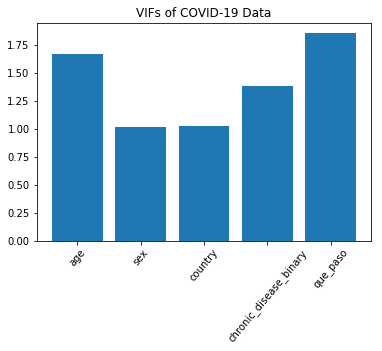

In [17]:
generate_vif_dataframe(xtrain)

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV


In [19]:
x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.5)


In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(336, 5)
(336,)
(337, 5)
(337,)


In [21]:
y_train

61147     0
74042     1
93044     1
213959    0
82868     1
         ..
6992      1
71958     1
216181    1
83095     0
83621     0
Name: que_paso, Length: 336, dtype: int64

In [22]:
y_train = x_train['que_paso']
x_train = x_train.drop('que_paso', axis = 1)

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(336, 4)
(336,)
(337, 5)
(337,)


In [24]:
clf1 = LogisticRegression(solver = 'liblinear').fit(x_train,y_train)

In [25]:
x_test

,age,sex,country,chronic_disease_binary,que_paso
7770,24.0,1,6,0,1
1001,71.0,1,2,0,1
779,43.0,0,2,0,1
90894,49.0,1,19,0,1
8769,27.0,0,2,0,1
...,...,...,...,...,...
8880,52.0,1,16,1,0
65608,63.0,0,23,0,1
43072,39.0,0,2,0,1
34362,61.0,0,18,0,1


In [26]:
x_test['que_paso']

7770     1
1001     1
779      1
90894    1
8769     1
        ..
8880     0
65608    1
43072    1
34362    1
1557     1
Name: que_paso, Length: 337, dtype: int64

In [27]:
y_test = x_test['que_paso']
x_test = x_test.drop('que_paso', axis = 1)

In [28]:
clf1.predict(x_test)
clf1.score(x_test, y_test)

0.8397626112759644

In [29]:
#clf1.predict_proba(x_test)

#### Testing different Solvers

 For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

‘liblinear’ and ‘saga’ also handle L1 penalty

‘saga’ also supports ‘elasticnet’ penalty

‘liblinear’ does not support setting penalty='none'

Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

In [30]:
testing = 0
scores = []
while testing < 300:
    x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.3)
    y_train = x_train['que_paso']
    x_train = x_train.drop('que_paso', axis = 1)
    clf1 = LogisticRegression(solver = 'liblinear').fit(x_train,y_train)
    y_test = x_test['que_paso']
    x_test = x_test.drop('que_paso', axis = 1)
    clf1.predict(x_test)
    scores.append(clf1.score(x_test, y_test))
    testing +=1

In [31]:
import statistics
statistics.mean(scores) 

0.8551485148514851

In [32]:
testing = 0
scores = []
while testing < 300:
    x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.3)
    y_train = x_train['que_paso']
    x_train = x_train.drop('que_paso', axis = 1)
    clf1 = LogisticRegression(solver = 'newton-cg').fit(x_train,y_train)
    y_test = x_test['que_paso']
    x_test = x_test.drop('que_paso', axis = 1)
    clf1.predict(x_test)
    scores.append(clf1.score(x_test, y_test))
    testing +=1

In [33]:
import statistics
statistics.mean(scores)

0.8526402640264026

In [34]:
testing = 0
scores = []
while testing < 300:
    x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.3)
    y_train = x_train['que_paso']
    x_train = x_train.drop('que_paso', axis = 1)
    clf1cv = LogisticRegressionCV(cv= 5, solver = 'liblinear').fit(x_train,y_train)
    y_test = x_test['que_paso']
    x_test = x_test.drop('que_paso', axis = 1)
    clf1.predict(x_test)
    scores.append(clf1.score(x_test, y_test))
    testing +=1

In [35]:
statistics.mean(scores)

0.8559405940594059

In [36]:
# testing = 0
# scores = []
# while testing < 300:
#     x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.3)
#     y_train = x_train['que_paso']
#     x_train = x_train.drop('que_paso', axis = 1)
#     clf1 = LogisticRegression(solver = 'newton-cg').fit(x_train,y_train)
#     y_test = x_test['que_paso']
#     x_test = x_test.drop('que_paso', axis = 1)
#     clf1.predict(x_test)
#     scores.append(clf1.score(x_test, y_test))
#     testing +=1

In [37]:
# statistics.mean(scores)

In [38]:
# testing = 0
# scores = []
# while testing < 300:
#     x_train, x_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size = 0.3)
#     y_train = x_train['que_paso']
#     x_train = x_train.drop('que_paso', axis = 1)
#     clf1 = LogisticRegression(solver = 'saga').fit(x_train,y_train)
#     y_test = x_test['que_paso']
#     x_test = x_test.drop('que_paso', axis = 1)
#     clf1.predict(x_test)
#     scores.append(clf1.score(x_test, y_test))
#     testing +=1

In [39]:
#statistics.mean(scores)

In [41]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

In [42]:
clf1 = LogisticRegression(solver = 'newton-cg').fit(x_train,y_train)

y_pred = clf1.predict(x_test)
y_prob = clf1.predict_proba(x_test)

In [54]:
# # define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# # define the model
# model = LogisticRegression()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.coef_[0]
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()
var = ['Age', 'Sex','Country', 'Chronic Disease']

Feature: 0, Score: -0.08735
Feature: 1, Score: 0.62521
Feature: 2, Score: -0.03170
Feature: 3, Score: -1.67188


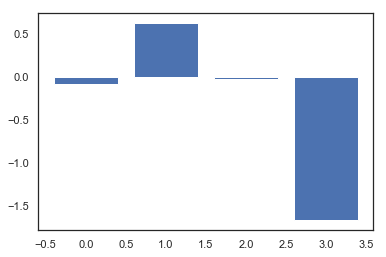

In [61]:
importance = clf1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
ax.set_yticklabels(var)
plt.show()

Feature: 0, Score: -0.08735
Feature: 1, Score: 0.62521
Feature: 2, Score: -0.03170
Feature: 3, Score: -1.67188


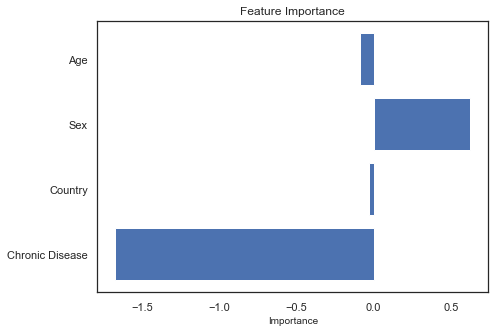

In [60]:
importance = clf1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
fig, ax = plt.subplots(figsize = (7,5))
y_pos = np.arange(len(var))

#ax.barh(y_pos, var_imp, align='center')
ax.barh([x for x in range(len(importance))], importance)
ax.set_yticks(y_pos)
ax.set_yticklabels(var)
ax.invert_yaxis() 
ax.set_xlabel('Importance', fontsize = 10)
ax.set_title('Feature Importance', fontsize = 12)

plt.show()

The positive scores indicate a feature that predicts class 1, whereas the negative scores indicate a feature that predicts class 0.

In [47]:
importance = clf1.coef_[0]
importance

array([-0.0873532 ,  0.62521197, -0.03169891, -1.67188293])

array([0, 1])